In [1]:
%run init_notebook.py

In [2]:
from statsmodels.regression.linear_model import OLS
from linearmodels.panel.model import PanelOLS
import scipy
import numpy as np
import pandas as pd

In [3]:
import lukas_utils as lutils
import lukas_utils.statsmodels
import lukas_utils.matplotlib

C:\Users\LukasGrahl\Documents\GIT\lukas_utils\notebooks


## OLS

In [88]:
lst_panel_structure = [*chain(*[[(idx, datetime.today() + timedelta(days=i)) for i in range(10)] for idx in range(10)])]

X = scipy.stats.norm(0, 100).rvs((100,3))
beta = np.random.rand(3)
y_true = X @ beta
y_obs = X @ beta + scipy.stats.norm(0, 100).rvs(100)
y_obs_panel = 1 \
                + ((np.array([i[0] for i in lst_panel_structure]) + .1) * np.random.rand(100)) \
                + X @ beta \
                + scipy.stats.norm(0,100).rvs(100)

df_X, df_y_obs = pd.DataFrame(X, columns=[f'regressor_{i}' for i in range(X.shape[1])]), pd.DataFrame(y_obs, columns=['y'])
df_y_panel = pd.DataFrame(y_obs_panel, columns=['y'])
df_X_panel = pd.DataFrame(X, index=pd.MultiIndex.from_tuples(lst_panel_structure), columns=df_X.columns)
                          
mod = OLS(df_y_obs, df_X).fit()
mod2 = OLS(df_y_obs, df_X).fit()
y_hat = mod.fittedvalues

<>:2: SyntaxWarning: invalid escape sequence '\^'
<>:2: SyntaxWarning: invalid escape sequence '\^'
C:\Users\LukasGrahl\AppData\Local\Temp\ipykernel_6404\4097831774.py:2: SyntaxWarning: invalid escape sequence '\^'
  ax[0].plot(y_hat, label="$\^{y}$")


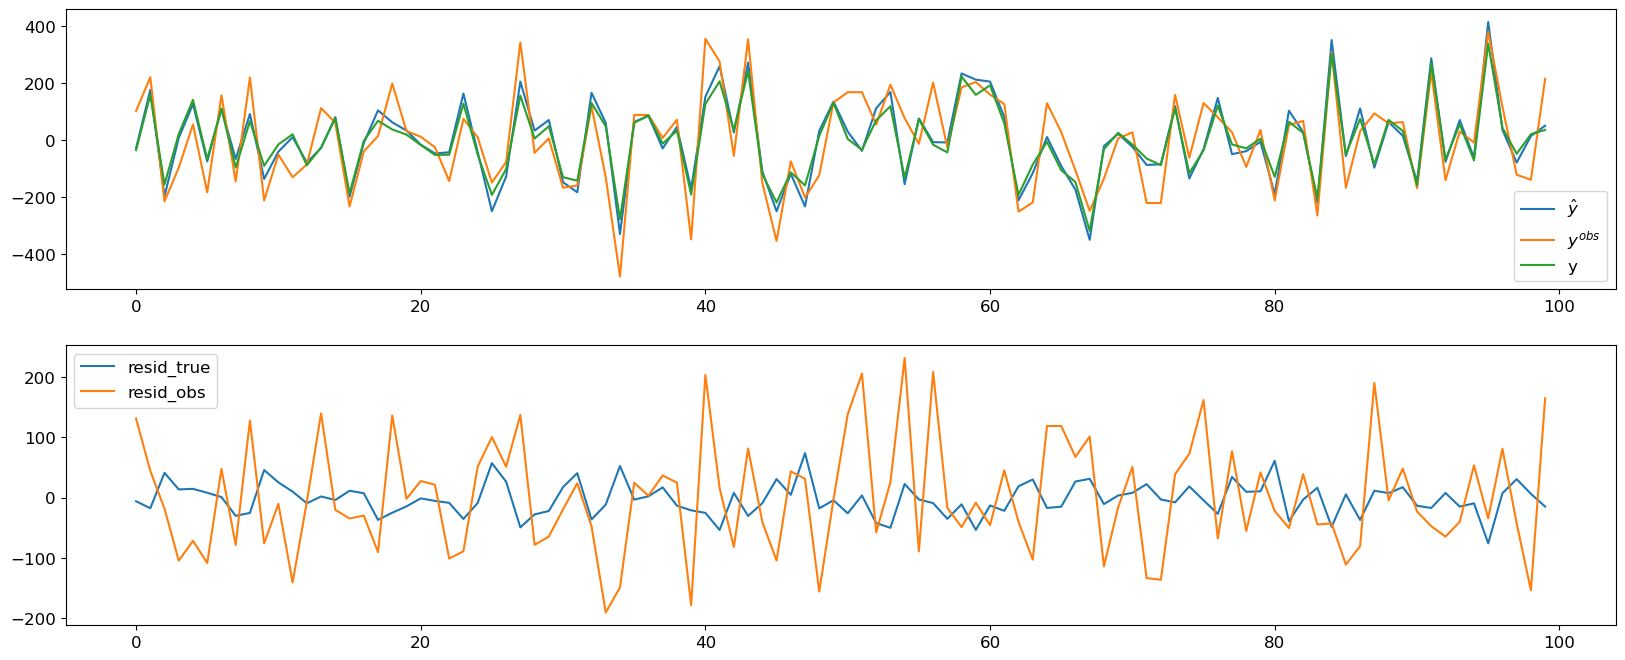

In [5]:
fig, ax = lutils.matplotlib.get_fig_subplots(2, figsize=(10,8))
ax[0].plot(y_hat, label="$\^{y}$")
ax[0].plot(y_obs, label="$y^{obs}$")
ax[0].plot(y_true, label='y')
ax[0].legend()
ax[1].plot(y_true - y_hat, label='resid_true')
ax[1].plot(y_obs - y_hat, label='resid_obs')
ax[1].legend()

In [6]:
# summary OLS

In [7]:
lutils.statsmodels.get_statsmodels_summary([mod, mod2], is_filt_sig=True)

,y,y_1
regressor_0,0.654 ***\n[6.44],0.654 ***\n[6.44]
regressor_1,0.706 ***\n[8.175],0.706 ***\n[8.175]
regressor_2,1.066 ***\n[10.815],1.066 ***\n[10.815]
N,100.0,100.0
R^2,0.696,0.696
R^2 adj.,0.687,0.687


In [8]:
# get dfbetas

In [89]:
df_betas = pd.DataFrame(lutils.statsmodels.get_dfbetas(mod.model.exog, mod.resid), columns=df_X.columns)
# df_betas  

''

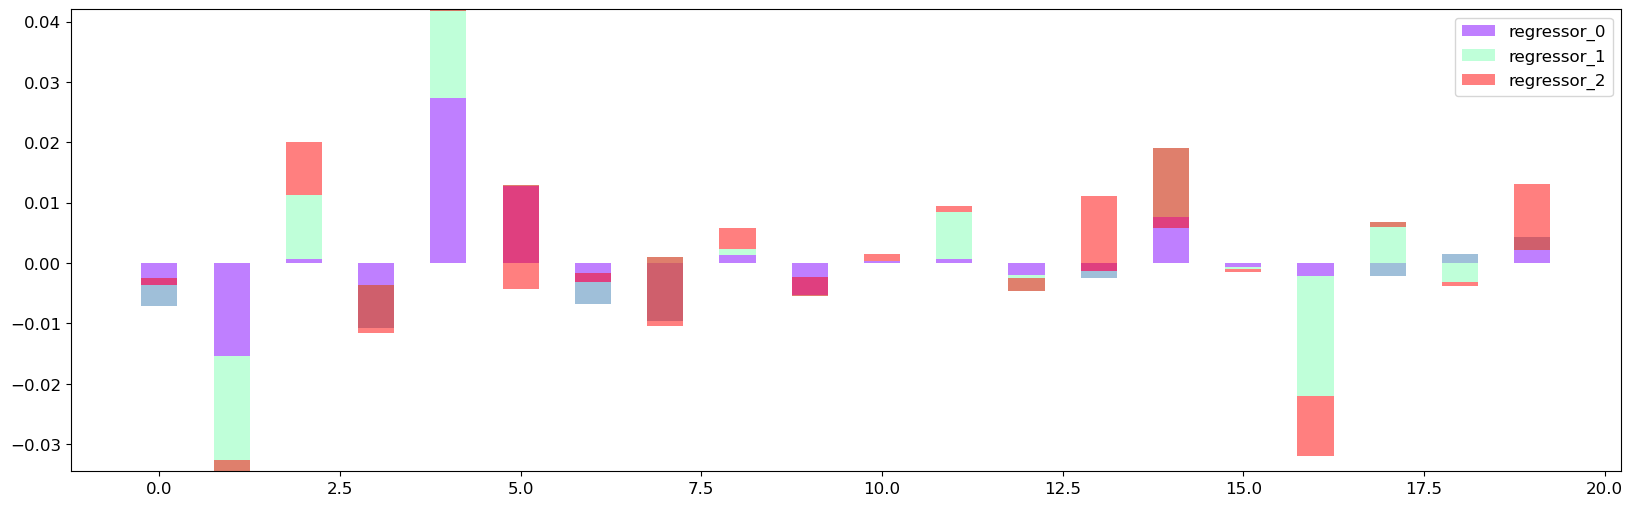

In [90]:
fig, ax = lutils.matplotlib.plt_stacked_bar(df_betas.iloc[:20], alpha=.5, width=.5)
# for col in df_betas:
#     plt.bar(df_betas.iloc[:20].index, df_betas.iloc[:20][col], alpha=.5, label=col)
ax.legend()
;

In [94]:
pols = PanelOLS(df_y_panel, df_X_panel, entity_effects=False).fit(cov_type='clustered')

In [97]:
beta

array([0.89572818, 0.22934973, 0.42170828])

In [95]:
pols.summary

Dep. Variable:,Dep,R-squared:,0.6286
Estimator:,PanelOLS,R-squared (Between):,-2397.5
No. Observations:,100,R-squared (Within):,0.6142
Date:,"Sun, Apr 07 2024",R-squared (Overall):,0.6286
Time:,19:37:27,Log-likelihood,-599.99
Cov. Estimator:,Clustered,,
,,F-statistic:,54.717
Entities:,1,P-value,0.0000
Avg Obs:,100.000,Distribution:,"F(3,97)"
Min Obs:,100.000,,
Max Obs:,100.000,F-statistic (robust):,61.908
